# Data Science & Business Analytics Internship at The Sparks Foundation (Jan 2021)


## Prediction using Supervised Machine Learning

#### Objective:  Predict the percentage score of a student based on the number of study hours using the Linear Regression supervised machine learning algorithm.

##### Author: Avaneesh Narayan Singh

### 1. Importing the dataset and all required libraries

In [1]:
import numpy as np
import pandas as pd            #importing all required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SVS= pd.read_csv("hours VS score.csv")  #importing the datset(csv file) from my computer
SVS.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
SVS.describe() # for basic description of the dataset like count, percentiles, mean etc

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### From this description, we can see that about 50% of students study less than the mean hours.

## 2.  Visualizing the dataset
     Here I have plot the dataset to check wheather they have some relation or not.

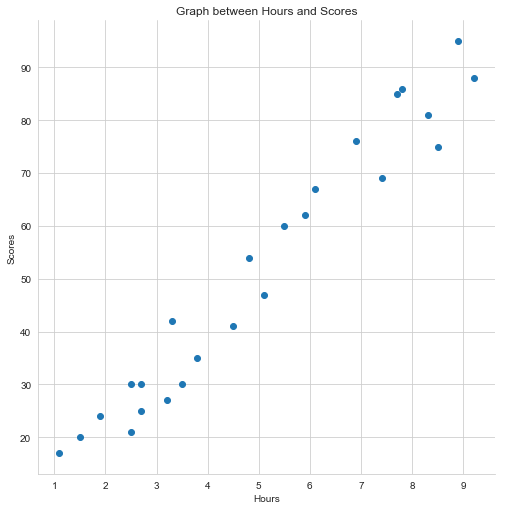

In [4]:
sns.set_style("whitegrid");
sns.FacetGrid(SVS,height=7).map(plt.scatter,"Hours","Scores").add_legend();
plt.title('Graph between Hours and Scores')
plt.show();

From the graph, we can observe that there is a linear relationship between "hours" and "score". So, we can use the linear regression model on it to predict further values.

## 3. Preparing the dataset
Here we will divide the dataset into attributes (input) and labels (output). Then we will split the dataset into two parts - Testing data and Training data

In [5]:
X = SVS.iloc[:, :-1].values  #Dividing into attributes and labels
Y = SVS.iloc[:, 1].values

In [6]:
#spliting the data into training and testing data. The ratio of this data is 20% (Test data) and 80% (Train Data)
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                            test_size=0.2, random_state=0)

## 4. Training  the Algorithm 

In [7]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 5. Visualization of the model

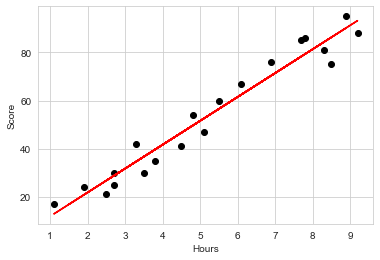

In [19]:
line = model.coef_ * X + model.intercept_   # Y = MX + C Equation of line
#plot for the train data
plt.scatter(X_train, Y_train, color="black" )
plt.plot(X,line,color="red")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show();

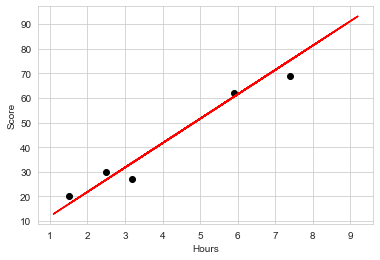

In [21]:
#plot for the test data 
plt.scatter(X_test, Y_test, color='black')
plt.plot(X, line, color='red')
plt.xlabel("Hours")  
plt.ylabel("Score")
plt.show()

## 6. Making Predictions


In [22]:
Y_predicted = model.predict(X_test)

In [23]:
df = pd.DataFrame({'Actual score': Y_test, 'Predicted score': Y_predicted})  
df

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
#Testing our own data with the model 
hours = 2
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 2 hours is 21.839473002719156


In [28]:
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is 93.69173248737538


## 7. Evaluation of the model
In the last step I have calculate the mean absolute error.

In [27]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))

Mean Absolute Error: 4.183859899002975
